In [1]:
import os

# list all data in folder data/
data_files = os.listdir("data/")
data_files = [f for f in data_files if f.endswith(".csv")]

In [2]:
# read all data
import pandas as pd
from format_data import format_type

data = {}
for f in data_files:
    df = pd.read_csv("data/" + f)
    # move Season column to 2nd column
    format_type(df)

    data[f] = df

KeyError: 'FIPS'

In [3]:
data.keys()

dict_keys(['winter2.csv', 'winter1.csv', 'fall2.csv', 'fall1.csv', 'spring1.csv', 'spring2.csv', 'summer2.csv', 'summer1.csv'])

In [6]:
# join all data
df = pd.concat(data.values(), ignore_index=True)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

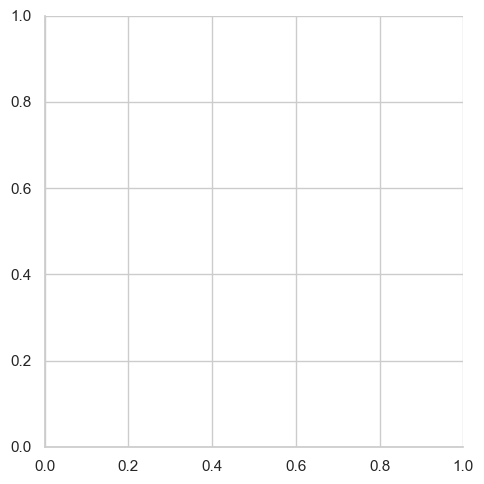

In [7]:
# sample plot
import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="month",
    y="passengers",
    col="year",
    hue="Season",
    kind="line",
    palette="crest",
    linewidth=4,
    zorder=5,
    col_wrap=3,
    height=2,
    aspect=1.5,
    legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.8, 0.85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df,
        x="month",
        y="passengers",
        units="year",
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()